# Data preprossing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# Load the two datasets
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')

# Concatenate or combin the datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicate rows
combined_df = combined_df.drop_duplicates()

In [3]:
# Drop answerContents, date, and views columns
combined_df = combined_df.drop(['answerContents', 'date', 'views'], axis=1)

In [4]:
# Save the combined dataset to a new file
combined_df.to_csv('combined_dataset.csv', index=False)

In [5]:
# Print the first few rows of the combined dataset
combined_df.head()

fatwaID                                           question  \
0   288008  علمنا أن الأموات سيبعثون بعد النفخة الثانية، و...   
1   425618  أداوم في كلية في أمريكا، وكانت هناك زميلة غير ...   
2   411699  أريد أن أسأل عن قاعدة: "ما حرم فعله حرم مشاهدت...   
3   417534  إذا رأى الأخ منكرا في أخواته، وسكت خوفا، ثم أخ...   
4   398028  حصل لي موقف لم أعرف كيف أتصرف فيه، فبينما أنا ...   

                                              answer answerSummary  \
0  ['الحمد لله.\nأولا:\nبعث الناس يوم القيامة يكو...           NaN   
1  ['الحمد لله.\nالوشم محرم، ملعون فاعله؛ لما روى...           NaN   
2  ['الحمد لله.\nأولا:\nقاعدة "كل ما حرم فعله حرم...           NaN   
3  ['الحمد لله.\nمن رأى منكرا وهو قادر على أن ينك...           NaN   
4  ['الحمد لله.\nتضارب النساء وشجارهن بالأيدي منك...           NaN   

           mainTopic                                  detailedTopicTree  \
0        ['العقيدة']  [['العقيدة', 'الإيمان', 'الإيمان باليوم الآخر ...   
1  ['العلم والدعوة']  [['العلم والدعوة', 'الدعوة', 'أحكام الأمر بالم...   
2  ['العلم والدعوة']  [['العلم والدعوة', 'الدعوة', 'أحكام الأمر بالم...   
3  ['العلم والدعوة']  [['العلم والدعوة', 'الدعوة', 'أحكام الأمر بالم...   
4  ['العلم والدعوة']  [['العلم والدعوة', 'الدعوة', 'أحكام الأمر بالم...   

                                     questionSummary  \
0    الأرض ستبدّل يوم القيامة؛ فمن أين يبعث الأموات؟   
1            الإعانة على الوشم بإعطاء كلمات تكتب فيه   
2           توضيح قاعدة: ما حرم فعله حرم التفرج عليه   
3  إذا رأى الاخ منكرا في أخواته وسكت ثم حصلت تبعا...   
4            عند المشاجرات النسائية كيف يتصرف الرجل؟   

                               fatwaRef  \
0               [49009, 303031, 220511]   
1                                    []   
2  [72204, 111959, 34489, 8957, 115294]   
3                                    []   
4                                    []   

                                                 url  
0  https://islamqa.info/ar/answers/288008/%D8%A7%...  
1  https://islamqa.info/ar/answers/425618/%D8%A7%...  
2  https://islamqa.info/ar/answers/411699/%D8%AA%...  
3  https://islamqa.info/ar/answers/417534/%D8%A7%...  
4  https://islamqa.info/ar/answers/398028/%D8%B9%...

# The number of values in the 'answerSummary' column

In [6]:
non_nan_count = combined_df['answerSummary'].notna().sum()
print(f"The number of rows with a non-NaN value in the 'answerSummary' column is: {non_nan_count}")

The number of rows with a non-NaN value in the 'answerSummary' column is: 1745


# Average number of words in each column

In [7]:
for column in ['question', 'answer', 'answerSummary', 'questionSummary']:
    word_counts = combined_df[column].str.split().str.len()
    average_words = word_counts.mean()
    print(f"The average number of words in the '{column}' column is: {average_words:.2f}")

The average number of words in the 'question' column is: 69.76
The average number of words in the 'answer' column is: 498.59
The average number of words in the 'answerSummary' column is: 50.57
The average number of words in the 'questionSummary' column is: 9.32


# Histogram graph

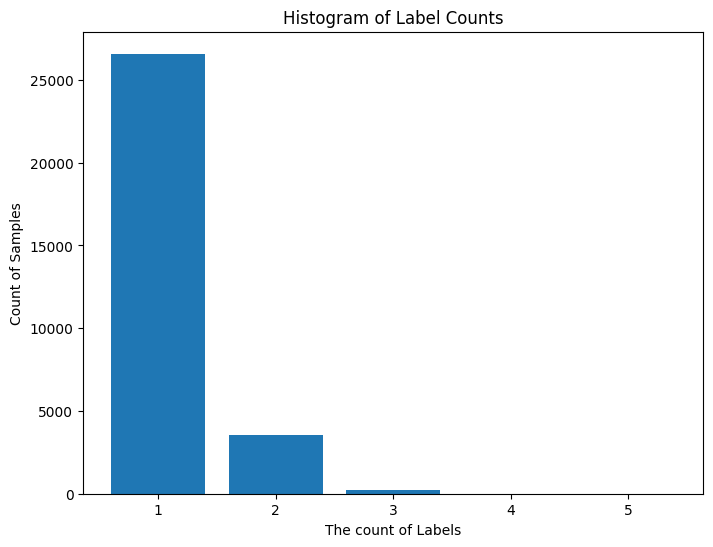

In [8]:
# Calculate the number of samples for each label count
label_counts = combined_df['mainTopic'].str.count(',') + 1
label_count_counts = label_counts.value_counts().sort_index()
# Create the histogram
plt.figure(figsize=(8, 6)) # Adjust the size as desired
plt.title("Histogram of Label Counts")
plt.xlabel("The count of Labels")
plt.ylabel("Count of Samples")
plt.bar(label_count_counts.index, label_count_counts.values)
plt.show()

#Number of unique topics

In [9]:
# Get the number of unique topics
topic_counts = combined_df['mainTopic'].value_counts()
num_topics = len(topic_counts)
print(f"Number of unique topics: {num_topics}")

Number of unique topics: 145


# Pie chart

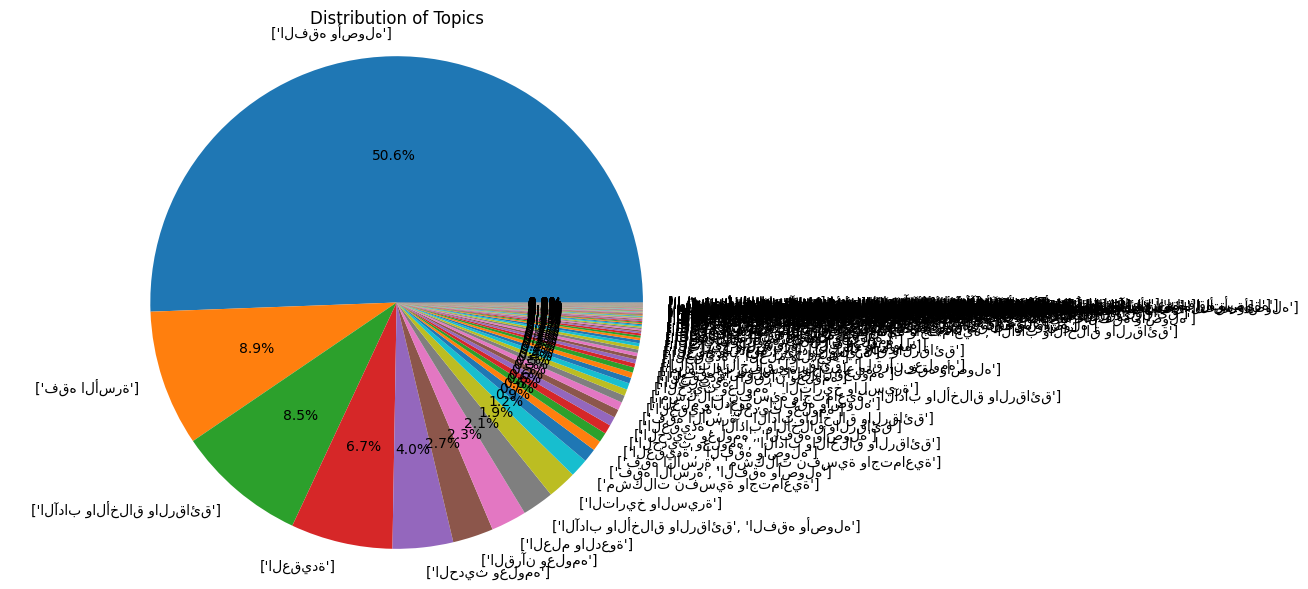

In [10]:
plt.figure(figsize=(12, 6))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Topics')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Minimize hierarchy of detailed topic tree

In [11]:
def minimize_hierarchy(detailed_topic_tree):
    # Convert the string data to a list
    detailed_topic_tree = [ast.literal_eval(topic) for topic in detailed_topic_tree]

    # Sort the branches by length
    detailed_topic_tree.sort(key=len, reverse=True)

    # Create a set to store unique branches
    unique_branches = set()

    # Minimize the branches
    minimized_tree = []
    for branch in detailed_topic_tree:
        is_unique = True
        for existing_branch in unique_branches:
            if all(item in existing_branch for item in branch):
                is_unique = False
                break
        if is_unique:
            unique_branches.add(tuple(branch))
            minimized_tree.append(branch)

    return minimized_tree